In [1]:
import GEOparse
import numpy as np
import pylab as pl
import seaborn as sns
from matplotlib import gridspec, pyplot as plt
from sklearn.decomposition import FastICA, PCA
import pandas as pd

In [2]:
"""
Import data and select only control subjects and severe AD subjects 
"""

gse = GEOparse.get_GEO(filepath = 'GDS810_full.soft.gz')
gse = pd.DataFrame(gse.table)


#Select only control and severe AD subjects 
subjects = ['GSM21215','GSM21217','GSM21218','GSM21219','GSM21220','GSM21221','GSM21226','GSM21231','GSM21232',
            'GSM21203','GSM21206','GSM21207','GSM21208','GSM21212','GSM21213','GSM21229']
x_sub_labels = {0:'C-1', 1:'C-2', 2:'C-3', 3: 'C-4', 4:'C-5', 5:'C-6', 6:'C-7', 7:'C-8', 8:'C-9', 
               9:'AD-1', 10:'AD-2', 11:'AD-3', 12:'AD-4', 13:'AD-5', 14:'AD-6', 15:'AD-7'}
sub_labels = ['C-1', 'C-2', 'C-3', 'C-4', 'C-5', 'C-6', 'C-7', 'C-8', 'C-9', 
              'AD-1', 'AD-2', 'AD-3', 'AD-4', 'AD-5', 'AD-6', 'AD-7']
data = gse.loc[:, subjects]


#Remove subjects C-2 and AD-2 and AD-3 due to noise
subjects = ['GSM21215','GSM21218','GSM21219','GSM21220','GSM21221','GSM21226','GSM21231','GSM21232',
            'GSM21203','GSM21207','GSM21208','GSM21212','GSM21213']
x_sub_labels = {0:'C-1', 1:'C-2', 2:'C-3', 3: 'C-4', 4:'C-5', 5:'C-6', 6:'C-7', 7:'C-8', 8:'C-9', 
               9:'AD-1', 10:'AD-2', 11:'AD-3', 12:'AD-4', 13:'AD-5', 14:'AD-6', 15:'AD-7'}
sub_labels = ['C-1', 'C-3', 'C-4', 'C-5', 'C-6', 'C-7', 'C-8', 'C-9', 
              'AD-1', 'AD-3', 'AD-4', 'AD-5', 'AD-6']
data = gse.loc[:, subjects]


#Check for NaN values 
assert not (data.isnull().values.any())


06-Mar-2022 15:00:15 INFO GEOparse - Parsing GDS810_full.soft.gz: 
06-Mar-2022 15:00:15 DEBUG GEOparse - DATABASE: Geo
06-Mar-2022 15:00:15 DEBUG GEOparse - DATASET: GDS810
06-Mar-2022 15:00:15 DEBUG GEOparse - SUBSET: GDS810_1
06-Mar-2022 15:00:15 DEBUG GEOparse - SUBSET: GDS810_2
06-Mar-2022 15:00:15 DEBUG GEOparse - SUBSET: GDS810_3
06-Mar-2022 15:00:15 DEBUG GEOparse - SUBSET: GDS810_4
06-Mar-2022 15:00:15 DEBUG GEOparse - ANNOTATION: 
06-Mar-2022 15:00:15 ERROR GEOparse - Cannot recognize type Annotation
06-Mar-2022 15:00:15 DEBUG GEOparse - DATASET: GDS810
<ipython-input-2-9ec9484e3e4a>:5: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  gse = GEOparse.get_GEO(filepath = 'GDS810_full.soft.gz')


Text(0.5, 1.0, 'Fig.1 Matrix A')

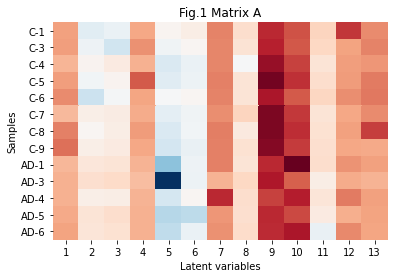

In [16]:
"""
Run FastICA on control and severe subjects 
"""

n = 13
ica = FastICA(n_components=n)
geneprofiles = ica.fit_transform(data)
A = ica.mixing_

sns.heatmap(A, cmap="RdBu", cbar=False, yticklabels=sub_labels, xticklabels=np.arange(1,n+1))

plt.xlabel("Latent variables")
plt.ylabel("Samples")
plt.title("Fig.1 Matrix A")


Text(0.5, 15.0, 'Samples')

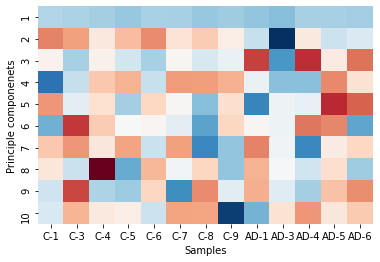

In [17]:
"""
Run PCA on control and severe subjects 
"""

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data)

sns.heatmap(pca.components_, cmap="RdBu", cbar=False, xticklabels=sub_labels, yticklabels=np.arange(1,11))

plt.ylabel("Principle componenets")
plt.xlabel("Samples")


(22283, 10)
(10, 13)


Text(668.9999999999999, 0.5, 'Principal components')

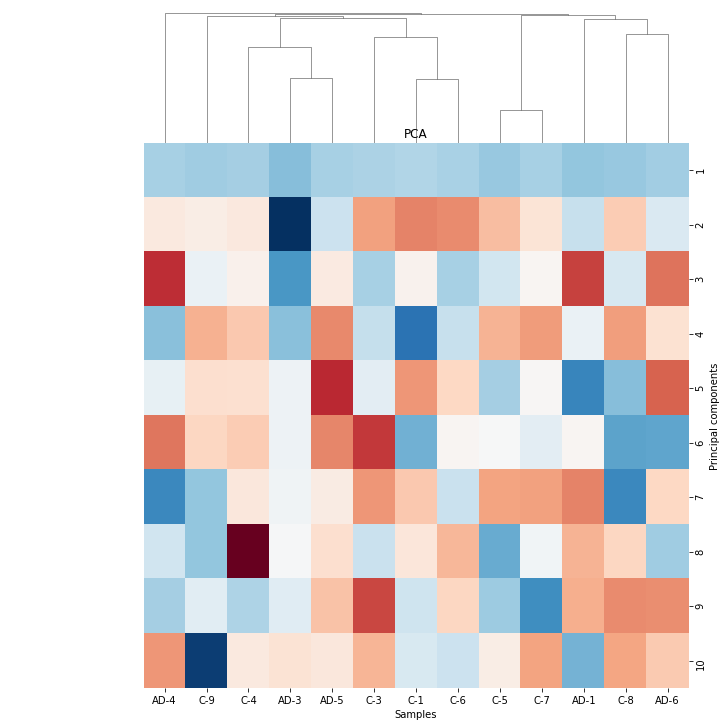

In [21]:
"""
Clustermap with PCA 
"""

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data)
pcs = pca.components_

sns.clustermap(pca.components_, metric="correlation", cmap="RdBu", cbar_pos=None, row_cluster=False, xticklabels=sub_labels, yticklabels=np.arange(1,11))

plt.title("PCA")
plt.xlabel("Samples")
plt.ylabel("Principal components")


Text(668.9999999999999, 0.5, 'Latent variables')

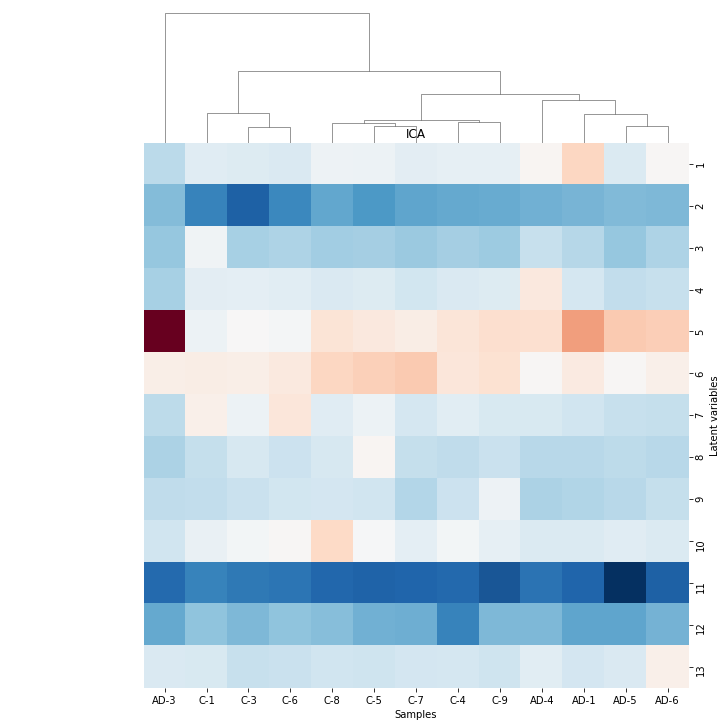

In [19]:
"""
Clustermap with ICA
"""

ica = FastICA(n_components=n)
geneprofiles = ica.fit_transform(data)
ica_A = ica.mixing_

sns.clustermap(ica_A.transpose(), metric="correlation", cmap="RdBu", cbar_pos=None, row_cluster=False, xticklabels=sub_labels, yticklabels=np.arange(1,n+1))

plt.title("ICA")
plt.xlabel("Samples")
plt.ylabel("Latent variables")


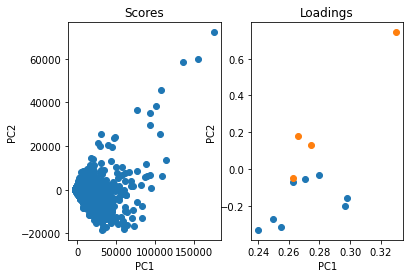

In [7]:
"""
Sort through genes and pick 3617 that are relevant
"""

#Plot scores and loadings to see which principal component best
#shows the difference between control and severe AD subjects
loadings = pd.DataFrame(pca.components_.T)

fig, axs = plt.subplots(1,2)
axs[0].scatter(principalComponents[:,0], principalComponents[:,1])
axs[0].set_xlabel('PC1')
axs[0].set_title('Scores')
axs[0].set_ylabel('PC2')
axs[1].scatter(loadings[0][0:8], loadings[1][0:8], label='Control')
axs[1].scatter(loadings[0][9:], loadings[1][9:], label='Severe')
axs[1].set_xlabel('PC1')
axs[1].set_title('Loadings')
axs[1].set_ylabel('PC2')

#Add indexes to PC2 and sort 
pc2 = principalComponents[:,1]
indexes = np.arange(0, len(pc2), dtype=int)   
pc2 = np.array((indexes, pc2))
sort_pc2 = pc2[:, pc2[1].argsort()]

#Choose 3617 most significant genes
sig_genes = sort_pc2[:, 18666:]



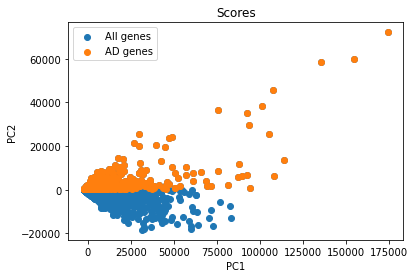

In [8]:
reorder = sig_genes[:, sig_genes[0].argsort()]

indexes_pc2 = reorder[0].astype(int)
select_pc2 = reorder[1]


pc1 = principalComponents[:,0]
select_pc1 = np.zeros(len(select_pc2))

for i in range(len(indexes_pc2)):
    select_pc1[i] = pc1[indexes_pc2[i]]


plt.scatter(principalComponents[:,0], principalComponents[:,1], label='All genes')
plt.xlabel('PC1')
plt.title('Scores')
plt.ylabel('PC2')
plt.scatter(select_pc1, select_pc2, label='AD genes')
plt.legend()


Text(0.5, 1.0, 'Fig.1 Matrix A')

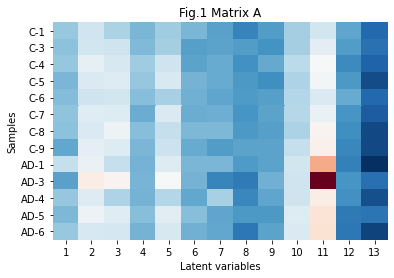

In [20]:
"""
Rerun ICA with only significant genes 
"""

sigData = data.loc[sig_genes[0]]

ica = FastICA(n_components=n)
geneprofiles = ica.fit_transform(sigData)
A = ica.mixing_

sns.heatmap(A, cmap="RdBu", cbar=False, yticklabels=sub_labels, xticklabels=np.arange(1,n+1))

plt.xlabel("Latent variables")
plt.ylabel("Samples")
plt.title("Fig.1 Matrix A")

Text(668.9999999999999, 0.5, 'Latent variables')

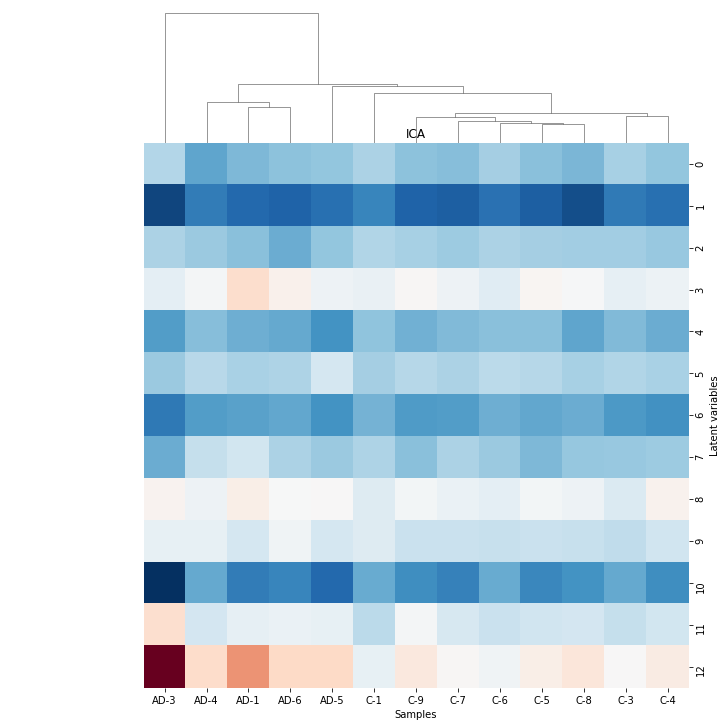

In [10]:
"""
Rerun ICA clustermap with only significant genes 
"""

ica = FastICA(n_components=n)
geneprofiles = ica.fit_transform(sigData)
ica_A = ica.mixing_

sns.clustermap(ica_A.transpose(), metric="correlation", cmap="RdBu", cbar_pos=None, row_cluster=False, xticklabels=sub_labels)

plt.title("ICA")
plt.xlabel("Samples")
plt.ylabel("Latent variables")


Text(668.9999999999999, 0.5, 'Principal components')

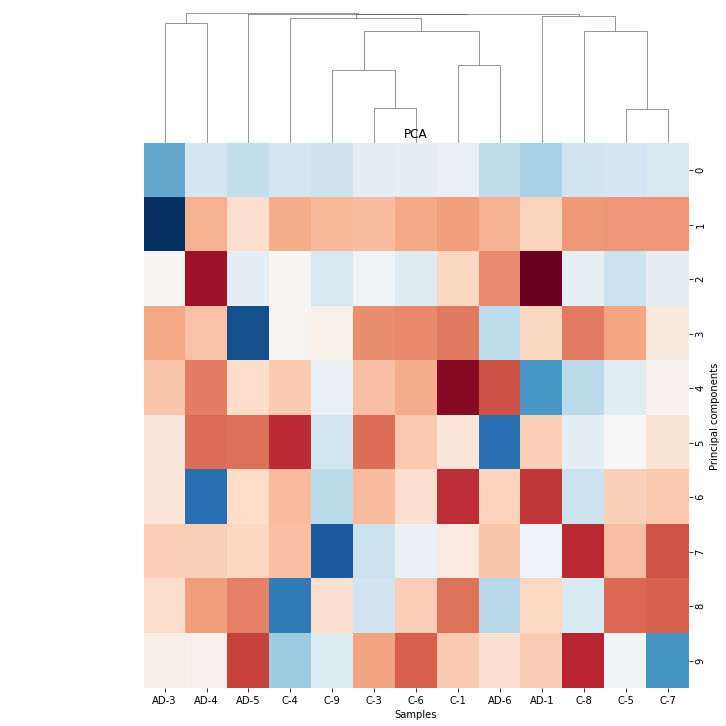

In [11]:
"""
Rerun PCA clustermap with only significant genes 
"""

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(sigData)

sns.clustermap(pca.components_, metric="correlation", cmap="RdBu", cbar_pos=None, row_cluster=False, xticklabels=sub_labels)

plt.title("PCA")
plt.xlabel("Samples")
plt.ylabel("Principal components")
